## Import packages

In [1]:
from imutils import contours
from skimage import measure
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

## Function declaration

Jupyter Notebook 및 Google Colab에서 이미지를 표시할 수 있도록 Function으로 정의

In [2]:
def img_show(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

이미지에서 빛 영역의 contours를 찾는 Function 정의

In [3]:
def bright_spot(img, w_pixel_cnt=100):
    # 배경색은 검정(0)으로 하고 연결된 구성요소에 label을 붙임
    labels = measure.label(img, connectivity=2, background=0)
    mask = np.zeros(img.shape, dtype="uint8")

    for label in np.unique(labels):
        # 배경 label이면 무시
        if label == 0:
            continue
            
        # 배경이 아니면 label mask를 구성
        label_mask = np.zeros(img.shape, dtype="uint8")
        label_mask[labels == label] = 255
        num_pixels = cv2.countNonZero(label_mask)
        # 구성요소의 픽셀 수가 임계값보다 큰 경우 mask에 추가
        if num_pixels > w_pixel_cnt:
            mask = cv2.add(mask, label_mask)
    
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = contours.sort_contours(cnts)[0]
    
    return cnts

## Load Image

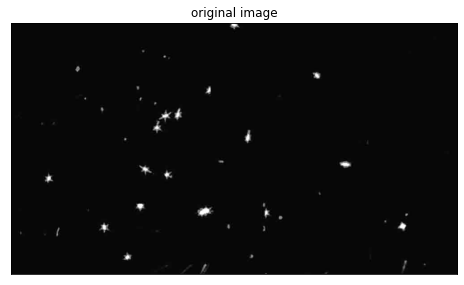

In [4]:
cv2_image = cv2.imread('asset/images/star_light.jpg', cv2.IMREAD_COLOR)
img_show('original image', cv2_image)

### Bright Spot Detection

In [5]:
gray = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
thresh = cv2.threshold(blurred, 90, 255, cv2.THRESH_BINARY)[1]
erode = cv2.erode(thresh, None, iterations=2)
dilate = cv2.dilate(erode, None, iterations=2)

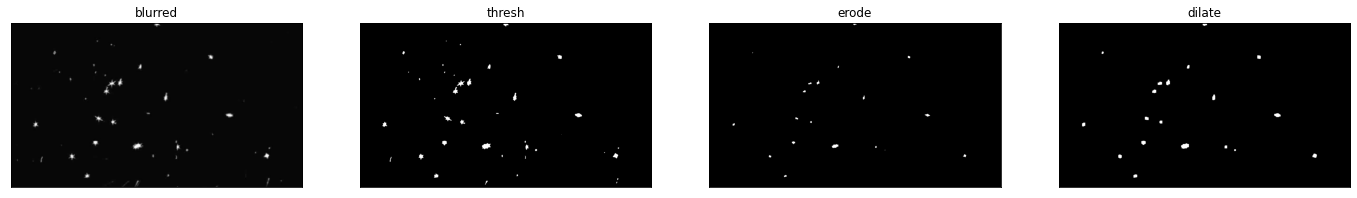

In [6]:
img_show(['blurred', 'thresh', 'erode', 'dilate'], [blurred, thresh, erode, dilate], figsize=(24,25))

In [7]:
vis = cv2_image.copy()

cnts = bright_spot(dilate, 10)

for (i, c) in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(vis, (int(cX), int(cY)), int(radius), (0, 255, 0), 3)

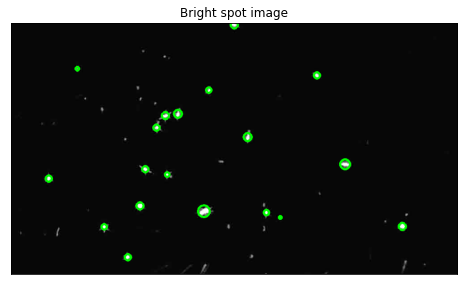

In [8]:
img_show('Bright spot image', vis)

추가로 간단하게 ```cv2.minMaxLoc``` 를 이용하여 이미지에서 가장 밝은 픽셀을 찾아 빛의 영역을 찾을 수도 있습니다.

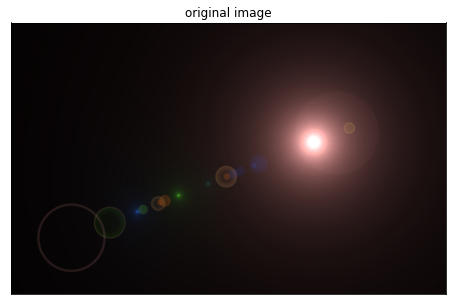

In [9]:
cv2_image = cv2.imread('asset/images/space.jpg', cv2.IMREAD_COLOR)
img_show('original image', cv2_image)

In [10]:
spot_img = cv2_image.copy()
gray = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (13, 13), 0)

(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(blurred)
spot_img = cv2.circle(spot_img, maxLoc, 90, (0, 255, 0), 5)

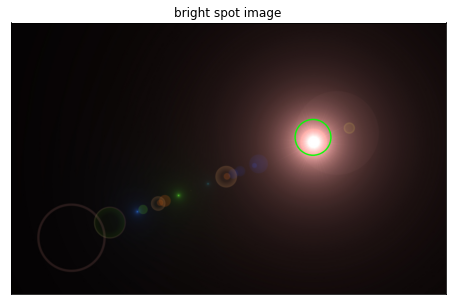

In [11]:
img_show('bright spot image', spot_img)